In [1]:
from Bio.Seq import Seq
from Bio import SeqIO

In [2]:
# Biopython Library for pairwise alignment of nucleotide sequence
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [3]:
seq1= Seq('ATTGCATCGATGCTAATCG')
seq1

Seq('ATTGCATCGATGCTAATCG')

In [4]:
seq2= Seq('ATTGCTCAAGACTAGCA')
seq2

Seq('ATTGCTCAAGACTAGCA')

In [5]:
dir(pairwise2)

['BiopythonWarning',
 'MAX_ALIGNMENTS',
 '_PRECISION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_align',
 '_clean_alignments',
 '_find_gap_open',
 '_find_start',
 '_finish_backtrace',
 '_make_score_matrix_fast',
 '_make_score_matrix_generic',
 '_python_make_score_matrix_fast',
 '_python_rint',
 '_recover_alignments',
 '_reverse_matrices',
 'affine_penalty',
 'align',
 'calc_affine_penalty',
 'dictionary_match',
 'format_alignment',
 'identity_match',
 'namedtuple',
 'print_matrix',
 'rint',
 'warnings']

In [6]:
alignment= pairwise2.align.globalxx(seq1,seq2)
alignment

[Alignment(seqA='ATTGCATCGAT-G-CTAATCG--', seqB='ATTGC-TC-A-AGACT-A--GCA', score=13.0, start=0, end=23),
 Alignment(seqA='ATTGCATCGATG-CTAATCG--', seqB='ATTGC-TC-AAGACT-A--GCA', score=13.0, start=0, end=22),
 Alignment(seqA='ATTGCATCG-ATG-CTAATCG--', seqB='ATTGC-TC-AA-GACT-A--GCA', score=13.0, start=0, end=23),
 Alignment(seqA='ATTGCATCGATG-CTAATCG--', seqB='ATTGC-TCAA-GACT-A--GCA', score=13.0, start=0, end=22),
 Alignment(seqA='ATTGCATC--GATGCTAATCG--', seqB='ATTGC-TCAAGA--CT-A--GCA', score=13.0, start=0, end=23),
 Alignment(seqA='ATTGCATCGAT-G-CTAATCG--', seqB='ATTGC-TC-A-AGACTA---GCA', score=13.0, start=0, end=23),
 Alignment(seqA='ATTGCATCGATG-CTAATCG--', seqB='ATTGC-TC-AAGACTA---GCA', score=13.0, start=0, end=22),
 Alignment(seqA='ATTGCATCG-ATG-CTAATCG--', seqB='ATTGC-TC-AA-GACTA---GCA', score=13.0, start=0, end=23),
 Alignment(seqA='ATTGCATCGATG-CTAATCG--', seqB='ATTGC-TCAA-GACTA---GCA', score=13.0, start=0, end=22),
 Alignment(seqA='ATTGCATC--GATGCTAATCG--', seqB='ATTGC-TCAAGA--

In [7]:
print(format_alignment(*alignment[0]))

ATTGCATCGAT-G-CTAATCG--
||||| || |  | || |  |  
ATTGC-TC-A-AGACT-A--GCA
  Score=13



In [8]:
for a in alignment:
    print(format_alignment(*a))

ATTGCATCGAT-G-CTAATCG--
||||| || |  | || |  |  
ATTGC-TC-A-AGACT-A--GCA
  Score=13

ATTGCATCGATG-CTAATCG--
||||| || |.| || |  |  
ATTGC-TC-AAGACT-A--GCA
  Score=13

ATTGCATCG-ATG-CTAATCG--
||||| ||  | | || |  |  
ATTGC-TC-AA-GACT-A--GCA
  Score=13

ATTGCATCGATG-CTAATCG--
||||| ||.| | || |  |  
ATTGC-TCAA-GACT-A--GCA
  Score=13

ATTGCATC--GATGCTAATCG--
||||| ||  ||  || |  |  
ATTGC-TCAAGA--CT-A--GCA
  Score=13

ATTGCATCGAT-G-CTAATCG--
||||| || |  | |||   |  
ATTGC-TC-A-AGACTA---GCA
  Score=13

ATTGCATCGATG-CTAATCG--
||||| || |.| |||   |  
ATTGC-TC-AAGACTA---GCA
  Score=13

ATTGCATCG-ATG-CTAATCG--
||||| ||  | | |||   |  
ATTGC-TC-AA-GACTA---GCA
  Score=13

ATTGCATCGATG-CTAATCG--
||||| ||.| | |||   |  
ATTGC-TCAA-GACTA---GCA
  Score=13

ATTGCATC--GATGCTAATCG--
||||| ||  ||  |||   |  
ATTGC-TCAAGA--CTA---GCA
  Score=13

ATTGCATCGAT-G-CTAAT-CG-
||||| || |  | || |  |  
ATTGC-TC-A-AGACT-A-GC-A
  Score=13

ATTGCATCGATG-CTAAT-CG-
||||| || |.| || |  |  
ATTGC-TC-AAGACT-A-GC-A
  Score=13

ATTGCAT

In [9]:
alignments= pairwise2.align.globalxx(seq1,seq2, score_only=True, one_alignment_only=True)
alignments

13.0

In [10]:
#Determine the percentage similarity
alignments/len(seq1)

0.6842105263157895

In [11]:
# Determine the Hamming Distance between two sequences (For dissimilarity measurement)
def hamming_distance(lhs,rhs):
    return len([(x,y) for x, y in zip (lhs,rhs) if x!=y])
hamming_distance(seq1,seq2)

12

In [12]:
# DOT PLOT :TO GRAPHICALLY SHOW THE SIMILARITY OR DISSIMILARITY OF BIOLOGICAL SEQUENCES
import matplotlib.pyplot as plt
import numpy as np

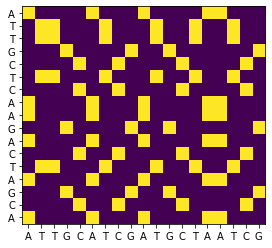

In [13]:
X, Y = seq1, seq2
X, Y = np.array(list(X)), np.array(list(Y))

plt.imshow(X==Y[:,None])        # the magic happens here, contourf should work similarly
plt.xticks(np.arange(len(X)), X)
plt.yticks(np.arange(len(Y)), Y)
plt.show()

In [14]:
# READ THE FASTA FILE TO DNA SEQUENCES
covid= SeqIO.read('SARS.fasta', 'fasta')
ebola= SeqIO.read('Ebola.fasta', 'fasta')
MERS= SeqIO.read('MERS.fasta', 'fasta')
Nig_SARS= SeqIO.read('SARS-NIG.fasta', 'fasta')
SARS= SeqIO.read('Severe.fasta', 'fasta')

In [15]:
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [16]:
SARS

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA', SingleLetterAlphabet()), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus, complete genome', dbxrefs=[])

In [17]:
ebola

SeqRecord(seq=Seq('ATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTCCT...ATT', SingleLetterAlphabet()), id='KY786024.1', name='KY786024.1', description='KY786024.1 Ebola virus strain Ebola virus/M.fascicularis-wt/GAB/2001/untreated-CCJ046D7, complete genome', dbxrefs=[])

In [18]:
MERS

SeqRecord(seq=Seq('GTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTC...TGC', SingleLetterAlphabet()), id='KJ556336.1', name='KJ556336.1', description='KJ556336.1 Middle East respiratory syndrome coronavirus isolate Jeddah_1_2013, complete genome', dbxrefs=[])

In [19]:
Nig_SARS

SeqRecord(seq=Seq('TTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...GAG', SingleLetterAlphabet()), id='MT576584.1', name='MT576584.1', description='MT576584.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/NGA/NG57752/2020, complete genome', dbxrefs=[])

In [20]:
# COMPARE THE LENGTHS OF THE VIRAL DNA SEQUENCES
covid_dna= covid.seq
len(covid_dna)

29903

In [21]:
SARS_dna= SARS.seq
len(SARS_dna)

29751

In [22]:
Nig_DNA= Nig_SARS.seq
len(Nig_DNA)

29760

In [23]:
ebola_dna= ebola.seq
len(ebola_dna)

18871

In [24]:
MERS_dna= MERS.seq
len(MERS_dna)

29890

# COMPARE THE GUANINE-CYTOSINE CONTENT OF EACH VIRUS

In [25]:
from Bio.SeqUtils import GC

In [26]:
print('The GC Content of Covid_DNA is ', GC(covid_dna))
print('The GC Content of Nig_DNA is ', GC(Nig_DNA))
print('The GC Content of SARS_DNA is ', GC(SARS_dna))
print('The GC Content of MERS_DNA is ', GC(MERS_dna))
print('The GC Content of Ebola_DNA is ', GC(ebola_dna))

The GC Content of Covid_DNA is  37.97277865097148
The GC Content of Nig_DNA is  38.01411290322581
The GC Content of SARS_DNA is  40.7616550704178
The GC Content of MERS_DNA is  41.17765138842422
The GC Content of Ebola_DNA is  41.248476498330774


NARRATIVE
Considering the GC content of the above organisms, it can be deduced that Ebola Virus is the most stable of the 5

# PROTEIN SYNTHESIS VIA TRANSLATION

In [27]:
covid_protein= covid_dna.translate()
Nig_protein= Nig_DNA.translate()
SARS_protein= SARS_dna.translate()
MERS_protein= MERS_dna.translate()
ebola_protein= ebola_dna.translate()

C:\Users\HP\anaconda3\lib\site-packages\Bio\Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [28]:
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [29]:
from Bio.SeqUtils import seq3
seq3(covid_protein)

'IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPhe

In [30]:
covid_aa= covid_protein.split('*')
covid_aa

[Seq('IKGLYLPR', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('QTNQLSISCRSVL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('TNFKICVAVTRLHA', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('CTHAV', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('LITNYCR', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('RWHLWLSRS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('KRRFAST', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('TALCVHQTFGCSNCTSWSCYG', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('AGSRTRRHSVRS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('W', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('DTWCPCPSCGRNTSGLPQGSSS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('ER', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Se

In [31]:
covid_clean= [str(i) for i in covid_aa]
print(covid_clean)

['IKGLYLPR', 'QTNQLSISCRSVL', 'TNFKICVAVTRLHA', 'CTHAV', 'LITNYCR', 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER', 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS', 'RWHLWLSRS', 'KRRFAST', 'TALCVHQTFGCSNCTSWSCYG', 'AGSRTRRHSVRS', 'W', 'DTWCPCPSCGRNTSGLPQGSSS', 'ER', '', 'RSWWP', 'LRRRSKVI', 'LRRRAWH', 'SL', 'RFSRKLEH', 'T', 'QWCYP', 'THA', 'A', 'RRGIHSLCR', 'QLLWP', 'WLPS', 'VH', 'RPSSTCW', 'SFMHFVRTTGLY', 'H', 'EGCILLP', 'T', 'A', 'NCLVHGTF', 'KEL', 'IADTF', 'N', 'IGKEI', 'HLQWGMSKFCISLKFHNQDYSTKG', 'KEKA', 'WLYG', 'NSICLSSCVTK', 'MQPNVPFNSHEV', 'SLW', 'NFMADGRFC', 'SHLRILWH', 'EFD', 'RRCHYLWLLTPKCCC', 'NLLSSMSQFRSRT', 'A', 'SCRIP', '', 'IWLENHSS', 'GWSHYCLWRLCVLLCWLP', 'QVCLLGSTC', 'R', 'HRL', 'PYRCCWRRFRRS', '', 'QPS', 'NTPKRESQHQYCW', 'L', 'T', '', 'RDRHYFGIFFCFHKCFCGNCERFGL', 'SIQTNC', 'ILW', 'F', 'SYKRKS', 'KRCLEYW', 'TEINTESSLCICIRGCSCCTINFLPHS', 'NCSKFCACFTEGRYNNTRWNFTVFTETH', 'CYDVHI', 'FGY', 'QSSCNGLHYRWCCSVDFAVAN', 'HLWHCL', 'KTQTRP', 'LA', 'REV', 'GRCRVS', 'RRLGNC', 'IYLNLCL', 'NCR

In [32]:
# CONVERT INTO READABLE DATAFRAME
import pandas as pd
covid= pd.DataFrame({'amino_acid':covid_clean})
covid.head()

,amino_acid
0,IKGLYLPR
1,QTNQLSISCRSVL
2,TNFKICVAVTRLHA
3,CTHAV
4,LITNYCR


In [33]:
covid['count']= covid['amino_acid'].str.len()
covid.head()

,amino_acid,count
0,IKGLYLPR,8
1,QTNQLSISCRSVL,13
2,TNFKICVAVTRLHA,14
3,CTHAV,5
4,LITNYCR,7


In [34]:
#Determine the length of the longest polypeptide chain
covid.nlargest(10, 'count')

,amino_acid,count
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
6,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
464,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
539,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
758,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43


In [35]:
Nig_aa= Nig_protein.split('*')
Nig_clean= [str(i) for i in Nig_aa]
Nig_clean

['FRSLVDLFSKRTLKSVWLSLGCMLSALTQYN',
 '',
 'LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV',
 'PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDES

In [36]:
Nig= pd.DataFrame({'amino_acids':Nig_clean})
Nig['count']= Nig['amino_acids'].str.len()
Nig.head()

,amino_acids,count
0,FRSLVDLFSKRTLKSVWLSLGCMLSALTQYN,31
1,,0
2,LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV,37
3,PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4409
4,VQPVLHRAAQALVLMSYTGLLTSTMIK,27


In [37]:
Nig.nlargest(10, 'count')

,amino_acids,count
3,PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4409
174,LEKTTELLFLVMFLLTTKRTMFVFLVLLPLVSSQCVNLTTRTQLPP...,1293
247,RSCCFRFHLNEQTKMSDNGPQNQRNAPRITFGGPSDSTGSNQNGER...,433
47,VKWSCVAVHYMLNQVEPHQEMPQLLMLIVFLTFVKLSRPMLMHFYL...,78
203,VNFPLAVMASNFSLFCACCCLQNKLDHRWNCYRNGLSCRLDVAQLL...,66
68,LTPVLKDSSFLQQKRSKLLRRHLNCLMVLLLYVKCCLTENYIFHGK...,64
120,KNYSILMPHILTNSQMVYAYFGIAMSIDILLIPLFVDLTLECYLTL...,57
75,CHKSTMLELLAYTQHSISQMSFLAMLQIIKRLVCKSILHSRDHLVL...,54
67,AIIVNHINHPLVFHCVLMDKFLVYIKIHVLVAIMLLTLMQLQHVIG...,53
163,LVIVQLYIQLINGISLLVICTTLRLKMLQKKMTLKRVFSLTFVGLYNKS,49


In [38]:
# Determine the most frequent amino acid in each viral protein
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [39]:
covid_count= ProteinAnalysis(str(covid_protein))
covid_count.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [40]:
dir(ProteinAnalysis)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_weight_list',
 'aromaticity',
 'charge_at_pH',
 'count_amino_acids',
 'flexibility',
 'get_amino_acids_percent',
 'gravy',
 'instability_index',
 'isoelectric_point',
 'molar_extinction_coefficient',
 'molecular_weight',
 'protein_scale',
 'secondary_structure_fraction']

In [41]:
# Method 2 is the use of COUNT
from collections import Counter

In [42]:
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [43]:
Counter(Nig_protein).most_common(10)

[('L', 1241),
 ('V', 763),
 ('T', 719),
 ('S', 705),
 ('I', 566),
 ('K', 547),
 ('A', 533),
 ('N', 502),
 ('F', 469),
 ('G', 466)]

In [44]:
Counter(SARS_protein).most_common(10)

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

In [45]:
Counter(MERS_protein).most_common(10)

[('L', 1118),
 ('S', 836),
 ('*', 721),
 ('V', 638),
 ('C', 609),
 ('R', 568),
 ('T', 549),
 ('F', 523),
 ('Y', 507),
 ('A', 468)]

In [46]:
Counter(ebola_protein).most_common(10)

[('L', 562),
 ('S', 555),
 ('I', 456),
 ('T', 449),
 ('R', 411),
 ('*', 377),
 ('K', 348),
 ('P', 331),
 ('N', 312),
 ('Q', 282)]

In [47]:
covid_freq= Counter(covid_protein)
Nig_freq= Counter(Nig_protein)
SARS_freq= Counter(SARS_protein)
MERS_freq= Counter(MERS_protein)
ebola_freq= Counter(ebola_protein)

CREATE A BARPLOT TO COMPARE THE FREQUENCY OF EACH AMINO ACID

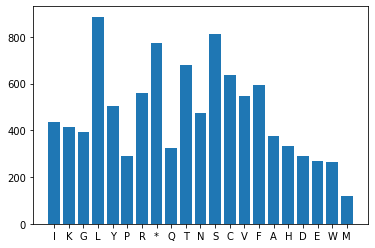

In [48]:
import matplotlib.pyplot as plt
plt.bar(covid_freq.keys(), covid_freq.values())
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

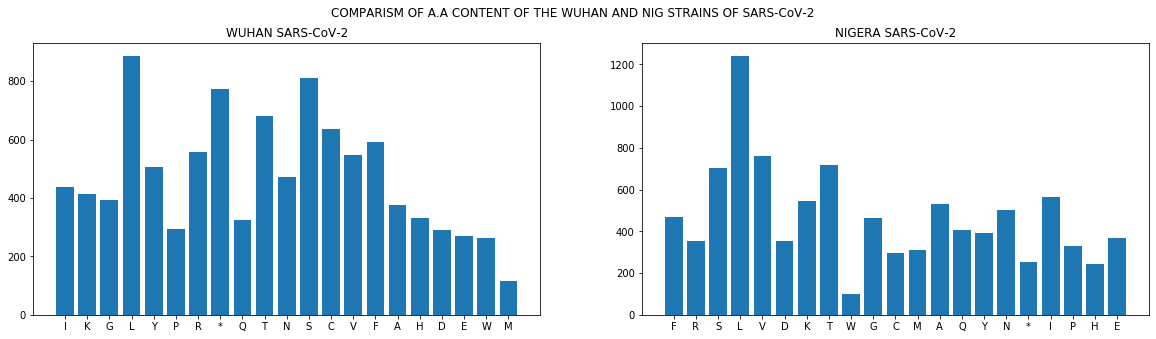

In [49]:
fig= plt.figure()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(20,5))
ax1.bar(covid_freq.keys(),covid_freq.values())
ax1.set_title('WUHAN SARS-CoV-2')
ax2.bar(Nig_freq.keys(), Nig_freq.values())
ax2.set_title('NIGERA SARS-CoV-2')
plt.suptitle('COMPARISM OF A.A CONTENT OF THE WUHAN AND NIG STRAINS OF SARS-CoV-2')
plt.show

In [50]:
fig.savefig('SARS-CoV-2')

In [51]:
# Hamming Distance of Dissimilarity
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip (lhs,rhs) if x!=y])
hamming_distance(Nig_DNA, covid_dna)

22013

In [57]:
# DETERMINE THE MOLECULAR WEIGHT OF THE VIRAL PROTEINS
ebola_weight= ProteinAnalysis(str(ebola_dna))
ebola_weight.molecular_weight()

1570641.6322000679

In [58]:
SARS_weight= ProteinAnalysis(str(SARS_dna))
SARS_weight.molecular_weight()

2492867.8620002586

In [59]:
covid_weight= ProteinAnalysis(str(covid_dna))
covid_weight.molecular_weight()

2507392.9272002894

In [60]:
Nig_weight= ProteinAnalysis(str(Nig_DNA))
Nig_weight.molecular_weight()

2495734.808700287

In [61]:
MERS_weight= ProteinAnalysis(str(MERS_dna))
MERS_weight.molecular_weight()

2523262.4203002807

In [63]:
covid_amino= ProteinAnalysis(str(covid_protein))
covid_amino.get_amino_acids_percent()

{'A': 0.03762415972709943,
 'C': 0.06371024380455503,
 'D': 0.029096016855623557,
 'E': 0.02708939500351159,
 'F': 0.05949633791511989,
 'G': 0.0395304504866058,
 'H': 0.033309922745058694,
 'I': 0.04374435637604093,
 'K': 0.04143674124611217,
 'L': 0.08889334804856025,
 'M': 0.011738737834855021,
 'N': 0.04735627570984248,
 'P': 0.029296679040834755,
 'Q': 0.0326076050968195,
 'R': 0.05598474967392395,
 'S': 0.08126818501053476,
 'T': 0.06812481187920136,
 'V': 0.05498143874786796,
 'W': 0.0263870773552724,
 'Y': 0.05066720176582723}

In [65]:
# PAIRWISE ALLIGNMENT OF NUCLEOTIDE SEQUENCES
covid_n_NigCovid= pairwise2.align.globalxx(covid_dna[0:100],Nig_DNA[0:100], one_alignment_only=True, score_only=True)
covid_n_NigCovid

60.0

In [66]:
covid_n_SARS= pairwise2.align.globalxx(covid_dna[0:100],SARS_dna[0:100], one_alignment_only=True, score_only=True)
covid_n_SARS

89.0

In [67]:
covid_n_MERS= pairwise2.align.globalxx(covid_dna[0:100],MERS_dna[0:100], one_alignment_only=True, score_only=True)
covid_n_MERS

62.0

In [68]:
covid_n_ebola= pairwise2.align.globalxx(covid_dna[0:100],ebola_dna[0:100], one_alignment_only=True, score_only=True)
covid_n_ebola

64.0

# COMPARE THE 3D STRUCTURES OF EACH VIRUS

In [70]:
from Bio.PDB import PDBParser
parser= PDBParser()
sars_structure= parser.get_structure('SARS-CoV-2','2g9t.pdb')

C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23721.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23723.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23725.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23727.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23729.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23731.


In [72]:
import nglview as nv
view= nv.show_biopython(sars_structure)
view

NGLWidget()

In [74]:
import py3Dmol
sars_view= py3Dmol.view(query='pdb:2g9t')
sars_view.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [80]:
MERS_structure= parser.get_structure('MERS','5w9h.pdb')
MERS_structure

C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40236.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40362.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 40488.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain p is discontinuous at line 40614.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain q is discontinuous at line 40782.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain r is discontinuous at line 40950.


<Structure id=MERS>

In [82]:
MERS_view= nv.show_biopython(MERS_structure)
MERS_view

NGLWidget()

In [83]:
mers_view= py3Dmol.view(query='pdb:5w9h')
mers_view.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [85]:
covid_structure= parser.get_structure('covid','6wji.pdb')
covid_structure

C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11495.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11496.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11498.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11499.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11502.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11505.


<Structure id=covid>

In [86]:
covid_view= nv.show_biopython(covid_structure)
covid_view

NGLWidget()

In [87]:
covid= py3Dmol.view(query='pdb:6wji')
covid.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [88]:
covid.render_image()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [75]:
ebola_structure= parser.get_structure('Ebola', '6ea7.pdb')
ebola_structure

C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16788.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16826.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16926.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16940.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17040.
  PDBConstructionWarning,
C:\Users\HP\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17054.


NGLWidget()

In [77]:
ebola= nv.show_biopython(ebola_structure)
ebola

NGLWidget()

In [78]:
ebola_view= py3Dmol.view(query='pdb:6ea7')
ebola_view.setStyle({'cartoon':{'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [79]:
ebola_view.render_image()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol